# 🧠 Análisis y Visualización de Predicciones de Felicidad Mundial

Este notebook tiene como objetivo principal explorar, visualizar e interpretar un conjunto de datos relacionados con los niveles de felicidad en distintos países, haciendo uso de un modelo de machine learning (Ridge Regression) para predecir el puntaje de felicidad con base en múltiples factores socioeconómicos.

A través de este análisis se busca:

- Conectarse a una base de datos PostgreSQL y extraer los datos relevantes.
- Comparar los valores reales de felicidad con los predichos por un modelo previamente entrenado.
- Visualizar patrones y relaciones entre variables como esperanza de vida, generosidad, libertad, apoyo social y percepción de corrupción.
- Interpretar los resultados del modelo utilizando coeficientes de regresión para identificar las características más influyentes en las predicciones.

Este trabajo combina técnicas de análisis de datos, visualización y aprendizaje automático para comprender mejor qué factores impactan la percepción de felicidad en distintas regiones del mundo.


# Configuración del Entorno de Trabajo

En esta celda se configura el entorno para que el notebook pueda acceder a módulos ubicados en directorios superiores al actual. Esto es útil cuando se organiza un proyecto con una estructura modular (por ejemplo, separando la configuración de la conexión a la base de datos en una carpeta `config`).

Se añade el directorio raíz del proyecto al `sys.path`, lo que permite importar correctamente los módulos personalizados durante el desarrollo del modelo de base de datos.


In [3]:
import sys
import os

# Agrega la carpeta raíz al path (ajusta según tu estructura real)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


# Importación de Librerías y Configuración de SQLAlchemy

En esta celda se importan todas las librerías necesarias para construir y visualizar el modelo de base de datos, incluyendo:

- `sqlalchemy`: para definir las clases de mapeo y columnas.
- `get_engine`: función personalizada para conectarse al motor de base de datos (desde `config/conexion_db.py`).
- `pandas`, `


In [10]:
from sqlalchemy import text
from config.conexion_db import get_connection
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String,Date,inspect
from sqlalchemy.orm import declarative_base
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib




In [6]:
import joblib

# Conexión a la Base de Datos

Aquí se establece la conexión al motor de base de datos PostgreSQL utilizando la función `get_engine()`. Se realiza una prueba rápida de conexión y se imprime un mensaje según el resultado.

Este paso es fundamental para poder extraer los datos que luego se analizarán y visualizarán.


In [3]:

engine = get_engine()

try:
    with engine.connect() as connection:
        print("✅ Conexión exitosa a PostgreSQL")
except Exception as e:
    print("❌ Error de conexión:", e)

✅ Conexión exitosa a PostgreSQL


# Consulta de Datos desde PostgreSQL

Se realiza una consulta SQL para extraer todos los registros de la tabla `predictions`. Los resultados se cargan en un DataFrame de `pandas` para facilitar su análisis posterior.

También se visualizan las primeras filas del DataFrame para tener una idea general del contenido.


In [4]:
# Consultar datos (ajusta el nombre de la tabla si es necesario)
df = pd.read_sql("SELECT * FROM Estimates;", engine)

# Ver los primeros datos
df.head()


,region,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,corruption_perception,generosity,dystopia_residual,cluster,happiness_level,happiness_category,predicted_happiness_score
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2,Alto,feliz,6.27927
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2,Alto,feliz,6.28912
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2,Alto,feliz,6.32226
3,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2,Alto,feliz,6.27349
4,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2,Alto,feliz,6.30250


# Exploración de las Columnas

Se imprimen los nombres de las columnas del DataFrame `df`. Esto ayuda a identificar las variables disponibles y cómo están etiquetadas, lo cual es útil para las visualizaciones y análisis que siguen.


In [5]:
print(df.columns)

Index(['region', 'happiness_score', 'gdp_per_capita', 'social_support',
       'life_expectancy', 'freedom', 'corruption_perception', 'generosity',
       'dystopia_residual', 'cluster', 'happiness_level', 'happiness_category',
       'predicted_happiness_score'],
      dtype='object')


# Comparación de Felicidad Promedio por Región

Se calcula el promedio de los puntajes de felicidad reales (`happiness_score`) y predichos (`predicted_happiness_score`) agrupados por región. Luego se crea un gráfico de barras horizontal que compara ambos valores para cada región.

Este análisis permite evaluar qué tan bien el modelo predice la felicidad en diferentes regiones del mundo.


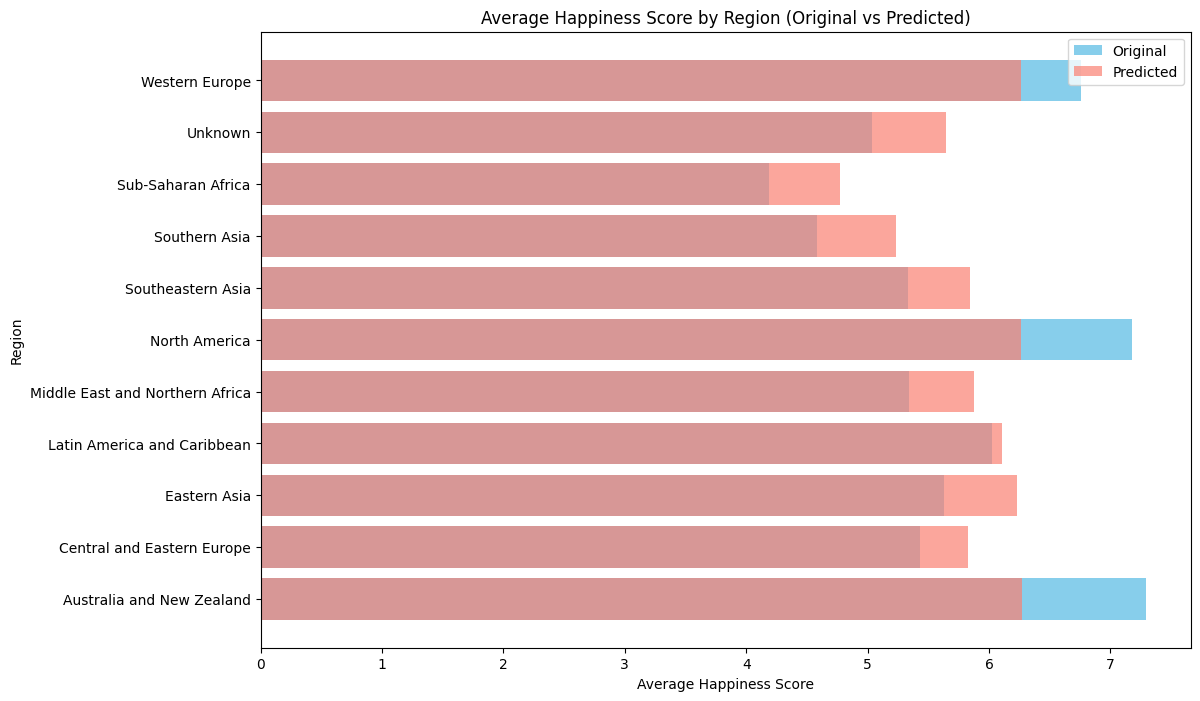

In [6]:

# Calcular el promedio de happiness_score y predicted_happiness_score por region
avg_happiness = df.groupby('region')[['happiness_score', 'predicted_happiness_score']].mean().reset_index()

# Crear la gráfica
plt.figure(figsize=(12, 8))

plt.barh(avg_happiness["region"], avg_happiness["happiness_score"], color='skyblue', label='Original')
plt.barh(avg_happiness["region"], avg_happiness["predicted_happiness_score"], color='salmon', alpha=0.7, label='Predicted')

plt.xlabel("Average Happiness Score")
plt.ylabel("Region")
plt.title("Average Happiness Score by Region (Original vs Predicted)")
plt.legend()


# Esperanza de Vida vs Felicidad Predicha

Se crea un gráfico de dispersión para observar la relación entre la esperanza de vida y la felicidad predicha por el modelo. Los puntos están coloreados según la categoría de felicidad (`happiness_category`).

Esto permite identificar posibles patrones entre longevidad y bienestar percibido.


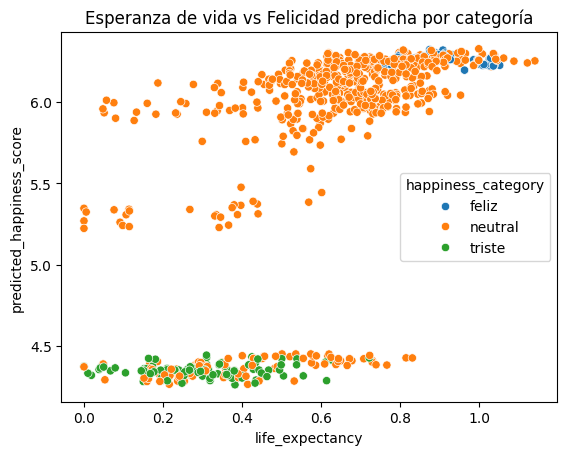

In [7]:
sns.scatterplot(x='life_expectancy', y='predicted_happiness_score', hue='happiness_category', data=df)
plt.title('Esperanza de vida vs Felicidad predicha por categoría')
plt.show()


# Generosidad vs Felicidad Predicha

Este gráfico de dispersión muestra la relación entre la generosidad y la felicidad predicha. Los datos están segmentados por región, permitiendo observar diferencias entre zonas geográficas.

Es útil para explorar cómo los valores culturales podrían estar relacionados con la percepción de felicidad.


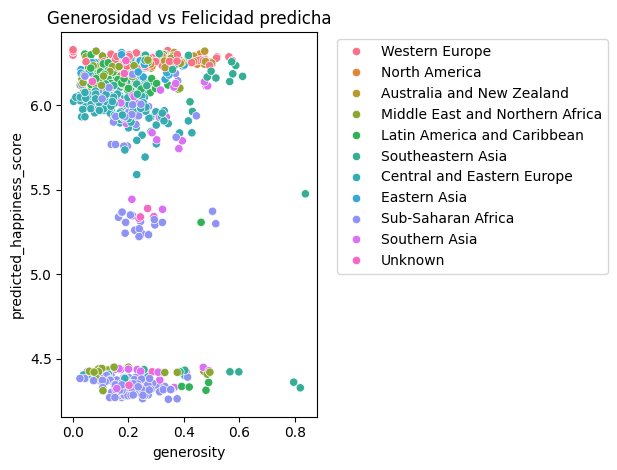

In [8]:
sns.scatterplot(x='generosity', y='predicted_happiness_score', hue='region', data=df)
plt.title('Generosidad vs Felicidad predicha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()


# Matriz de Correlaciones

Se calcula y visualiza la matriz de correlación entre varias variables, incluyendo los puntajes de felicidad reales y predichos.

El mapa de calor generado facilita la identificación de relaciones lineales fuertes entre variables, lo cual es útil para entender cómo se relacionan entre sí los distintos factores considerados por el modelo.


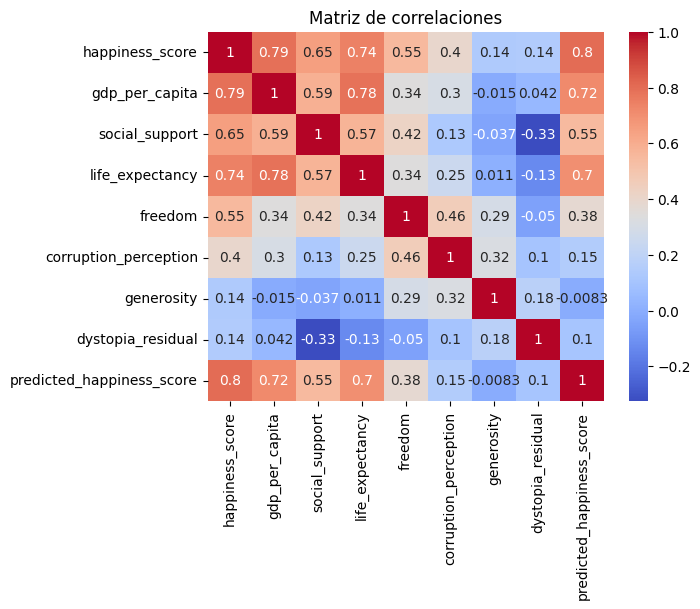

In [9]:
corr = df[['happiness_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 
           'freedom', 'corruption_perception', 'generosity', 'dystopia_residual', 
           'predicted_happiness_score']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlaciones')
plt.show()


# Carga del Modelo Entrenado

Se carga un modelo previamente entrenado utilizando `joblib`. El archivo `.pkl` contiene un pipeline de machine learning que será utilizado para analizar la importancia de las características que contribuyen a la predicción de felicidad.


In [7]:

# Define the path to the .pkl file
modelo_path = r"C:\Users\Acer\OneDrive\Escritorio\Workshops y Proyectos\workshop3\modelo\ridge_model.pkl"

rf_model = joblib.load(modelo_path)

In [9]:
import joblib

# Ruta al archivo .pkl
modelo_path = r"C:\Users\Acer\OneDrive\Escritorio\Workshops y Proyectos\workshop3\modelo\ridge_model.pkl"

# Cargar el modelo
modelo_objeto = joblib.load(modelo_path)

# Ver las claves almacenadas (útil para inspección)
print("Claves del archivo pkl:", modelo_objeto.keys())

# Extraer y mostrar las features
features = modelo_objeto['features']
print("✅ Features del modelo:")
for f in features:
    print("-", f)


Claves del archivo pkl: dict_keys(['modelo', 'features'])
✅ Features del modelo:
- GDP_per_Capita
- Social_Support
- Life_Expectancy
- Freedom
- Corruption_Perception
- Generosity
- Country_Albania
- Country_Algeria
- Country_Angola
- Country_Argentina
- Country_Armenia
- Country_Australia
- Country_Austria
- Country_Azerbaijan
- Country_Bahrain
- Country_Bangladesh
- Country_Belarus
- Country_Belgium
- Country_Belize
- Country_Benin
- Country_Bhutan
- Country_Bolivia
- Country_Bosnia and Herzegovina
- Country_Botswana
- Country_Brazil
- Country_Bulgaria
- Country_Burkina Faso
- Country_Burundi
- Country_Cambodia
- Country_Cameroon
- Country_Canada
- Country_Central African Republic
- Country_Chad
- Country_Chile
- Country_China
- Country_Colombia
- Country_Comoros
- Country_Congo (Brazzaville)
- Country_Congo (Kinshasa)
- Country_Costa Rica
- Country_Croatia
- Country_Cyprus
- Country_Czech Republic
- Country_Denmark
- Country_Djibouti
- Country_Dominican Republic
- Country_Ecuador
- 

# Exploración del Pipeline del Modelo

Se visualizan los pasos del pipeline cargado. Esto permite identificar qué transformaciones y modelos están incluidos en el flujo de trabajo de predicción.


# Importancia de Características del Modelo Ridge

Esta celda extrae los nombres de las características polinómicas generadas, obtiene los coeficientes del modelo Ridge, y crea un gráfico de barras con las 10 características más influyentes.

Este análisis ayuda a interpretar el modelo, mostrando qué factores tienen mayor peso al predecir la felicidad.


In [19]:
features = getattr(rf_model, 'feature_names_in_', None)

if features is None:
    print("El modelo no tiene el atributo 'feature_names_in_'. No se pueden obtener nombres de features.")
else:
    importancias = rf_model.feature_importances_

    plt.figure(figsize=(10,6))
    plt.barh(features, importancias, color='skyblue')
    plt.xlabel('Importancia')
    plt.title('Importancia de características - Random Forest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

El modelo no tiene el atributo 'feature_names_in_'. No se pueden obtener nombres de features.
